In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
import math
from scipy.signal import butter, lfilter, freqz,cheby1,cheby2,freqs
from scipy.fft import fft, fftfreq,ifft,fftshift
from google.colab import files
import io

# **Exhaust Fan**

In [ ]:
filename="fan.xlsx"
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded[filename]), header = 0)

t=df.time
gain=df.gain

Saving fan.xlsx to fan.xlsx


In [ ]:
t=np.array(t)
g=np.array(gain)  

In [ ]:
fan_on=g[154:g.size]
t_on=t[154:g.size]

mean = np.mean(fan_on)
std = 1
#std = np.std(fan_on)

num_samples = len(fan_on)
white = np.random.normal(mean, std, size=num_samples)

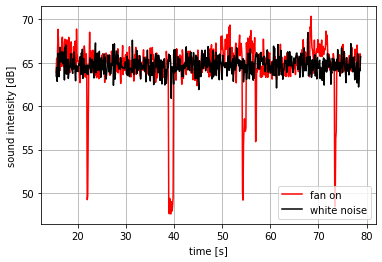

In [ ]:
plt.plot(t_on,fan_on,'r',label='fan on')
plt.plot(t_on,white,'k',label='white noise')
plt.xlabel('time [s]')
plt.ylabel('sound intensity [dB]')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('fan.png',dpi=300)

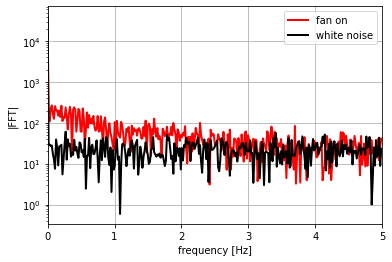

In [ ]:
dt=0.1

yf = fft(fan_on)
xf = fftfreq(yf.size, dt)

yfw = fft(white)
xfw = fftfreq(yfw.size, dt)

plt.semilogy(fftshift(xf), np.absolute(fftshift(yf)),'r',lw=2,label='fan on')
plt.semilogy(fftshift(xfw), np.absolute(fftshift(yfw)),'k',lw=2,label='white noise')
plt.legend()
plt.xlim(0,5)
plt.xlabel("frequency [Hz]")
plt.ylabel("|FFT|")
plt.grid()
plt.savefig('fft.png',dpi=300)

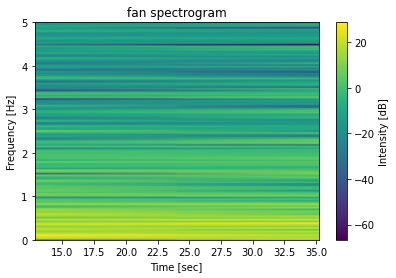

In [ ]:
f_fan, t_fan, Sxx_fan = signal.spectrogram(fan_on, 1/dt)
f_white, t_white, Sxx_white = signal.spectrogram(white, 1/dt)

fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
im1=ax1.pcolormesh(t_fan, f_fan, 20*np.log10(Sxx_fan), shading='gouraud')
ax1.set_title("fan spectrogram")
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
fig.colorbar(im1).set_label('Intensity [dB]')

plt.savefig("spectrogram.png",dpi=300)

# **Washing Machine**

In [ ]:
filename="wash.csv"
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[filename]), header = 0)

t=df.time
g_x=df.gFx
g_y=df.gFy
g_z=df.gFz


Saving wash.csv to wash.csv


In [ ]:
t=np.array(t)
g_x=np.array(g_x)
g_y=np.array(g_y)
g_z=np.array(g_z)

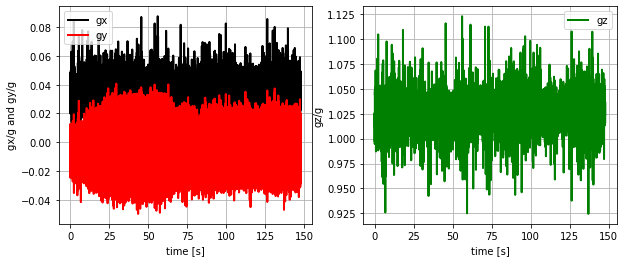

In [ ]:
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax1.plot(t, g_x,'k',lw=2,label='gx')
ax1.plot(t, g_y,'r',lw=2,label='gy')

ax1.legend()
ax1.set_xlabel("time [s]")
ax1.set_ylabel("gx/g and gy/g")
ax1.grid()

ax2=fig.add_subplot(1,2,2)
ax2.plot(t, g_z,'g',lw=2,label='gz')
ax2.legend()
ax2.set_xlabel("time [s]")
ax2.set_ylabel("gz/g")
ax2.grid()
plt.savefig('gx.png',dpi=300)


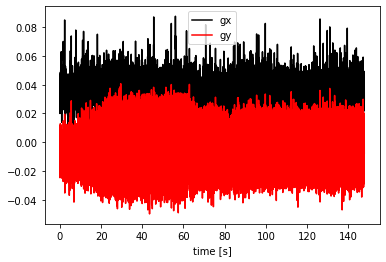

In [ ]:
plt.plot(t,g_x,'k',label='gx')
plt.plot(t,g_y,'r',label='gy')
#plt.plot(t,g_z,'g',label='gy')

plt.xlabel('time [s]')
plt.legend()


In [ ]:
dt=0.01

yf_x = fft(g_x)
xf_x = fftfreq(yf_x.size, dt)

yf_y = fft(g_y)
xf_y = fftfreq(yf_y.size, dt)

yf_z = fft(g_z)
xf_z = fftfreq(yf_z.size, dt)

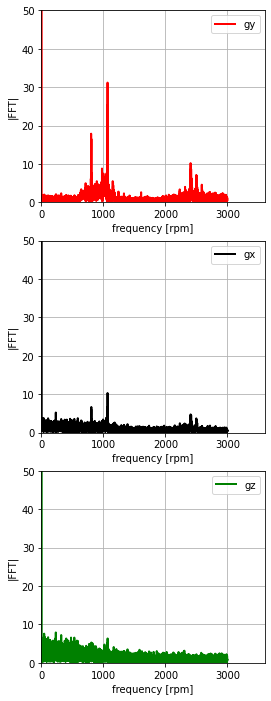

In [ ]:
fig=plt.figure(figsize=(4,12))
ax1=fig.add_subplot(3,1,1)
ax1.plot(fftshift(xf_y)*60, np.absolute(fftshift(yf_y)),'r',lw=2,label='gy')
ax1.legend()
ax1.set_xlim(0,60*60)
#ax1.set_xlim(2000,3000)
ax1.set_ylim(0,50)
ax1.set_xlabel("frequency [rpm]")
ax1.set_ylabel("|FFT|")
ax1.grid()

ax2=fig.add_subplot(3,1,2)
ax2.plot(fftshift(xf_x)*60, np.absolute(fftshift(yf_x)),'k',lw=2,label='gx')
ax2.legend()
ax2.set_xlim(0,60*60)
#plt.xlim(15,20)
ax2.set_ylim(0,50)
ax2.set_xlabel("frequency [rpm]")
ax2.set_ylabel("|FFT|")
ax2.grid()

ax3=fig.add_subplot(3,1,3)
ax3.plot(fftshift(xf_z)*60, np.absolute(fftshift(yf_z)),'g',lw=2,label='gz')
ax3.legend()
ax3.set_xlim(0,60*60)
#plt.xlim(15,20)
ax3.set_ylim(0,50)
ax3.set_xlabel("frequency [rpm]")
ax3.set_ylabel("|FFT|")
ax3.grid()

plt.savefig('fft_g.png',dpi=300)


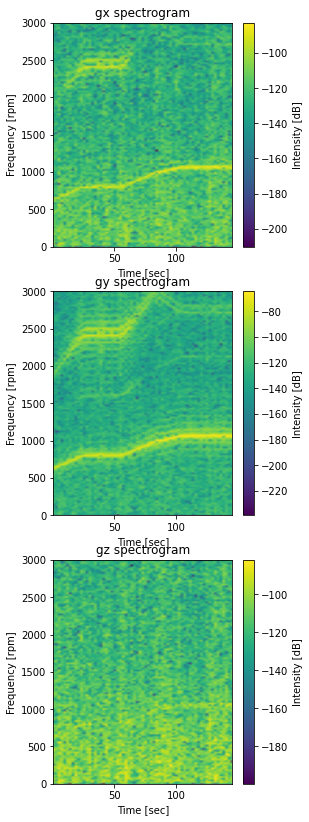

In [ ]:
f_x, t_x, Sxx_x = signal.spectrogram(g_x, 1/dt)
f_y, t_y, Sxx_y = signal.spectrogram(g_y, 1/dt)
f_z, t_z, Sxx_z = signal.spectrogram(g_z, 1/dt)

fig=plt.figure(figsize=(4,14))
ax1=fig.add_subplot(311)
im1=ax1.pcolormesh(t_x, 60*f_x, 20*np.log10(Sxx_x), shading='gouraud')
ax1.set_title("gx spectrogram")
ax1.set_ylabel('Frequency [rpm]')
ax1.set_xlabel('Time [sec]')
fig.colorbar(im1).set_label('Intensity [dB]')

ax2=fig.add_subplot(312)
im2=ax2.pcolormesh(t_y, 60*f_y, 20*np.log10(Sxx_y), shading='gouraud')
ax2.set_title("gy spectrogram")
ax2.set_ylabel('Frequency [rpm]')
ax2.set_xlabel('Time [sec]')
fig.colorbar(im2).set_label('Intensity [dB]')

ax3=fig.add_subplot(313)
im3=ax3.pcolormesh(t_z, 60*f_z, 20*np.log10(Sxx_z), shading='gouraud')
ax3.set_title("gz spectrogram")
ax3.set_ylabel('Frequency [rpm]')
ax3.set_xlabel('Time [sec]')
fig.colorbar(im3).set_label('Intensity [dB]')

plt.savefig("spectrogram.png",dpi=300)